In [1]:
import os 
import glob
import pandas as pd
import numpy as np
import datetime

from data.lds.lds_handler import LocalDataStorage as lds
from datetime import datetime
import pandas as pd
import numpy as np

startTime_string = '2018-08-10'
endTime_string = '2022-08-10'
datetime_format = '%Y-%m-%d'

code = 'A'+'244580'
#head = '삼성전자'

start_date = datetime.strptime(startTime_string, datetime_format)
end_date = datetime.strptime(endTime_string, datetime_format)

#data = lds.get_chart_min_data('A005930', start_date, end_date)
data = lds.get_strategy_day_data(code , startTime_string, endTime_string)

date_list = []
price_list = []

for i in range(0, len(data)):
    date_list.append(data[i]['date'].strftime('%Y-%m-%d'))
    price_list.append(data[i]['close_price'])
day_data = pd.DataFrame((zip(date_list, price_list)), columns = ['date', code]).copy()

/tmp/ipykernel_17213/1927983499.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['strategy'][trades] -= self.tc
/tmp/ipykernel_17213/1927983499.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['strategy'][trades] -= self.tc
/tmp/ipykernel_17213/1927983499.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['strategy'][trades] -= self.tc


(191127.07, -2484798.86)
(242398.76, -2286035.18)
(172187.53, -2356246.42)


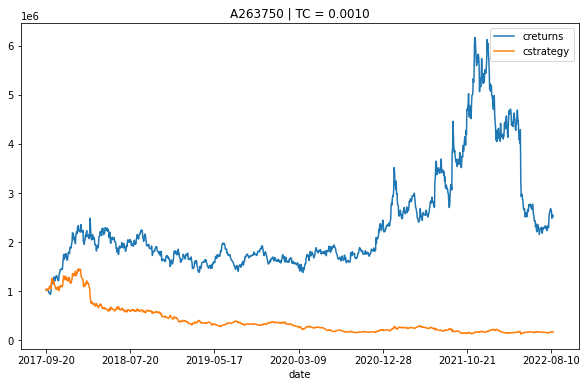

In [10]:
import os 
from datetime import datetime
from data.lds.lds_handler import LocalDataStorage as lds
import pandas as pd
import numpy as np


class MomVectorBacktester(object):
    def __init__(self, symbol, start, end, amount, tc):
        self.symbol = symbol
        self.start = start
        self.end = end
        self.amount = amount
        self.tc = tc
        self.results = None
        self.get_data()

    def get_data(self):
        ''' 데이터를 검색하고 준비
        '''
  
        datetime_format = '%Y-%m-%d'

        self.symbol = code = 'A'+ self.symbol
        #head = '삼성전자'

        start_date = datetime.strptime(self.start, datetime_format)
        end_date = datetime.strptime(self.end, datetime_format)

        #data = lds.get_chart_min_data('A005930', start_date, end_date)
        data = lds.get_strategy_day_data(code , self.start, self.end)

        date_list = []
        price_list = []

        for i in range(0, len(data)):
            date_list.append(data[i]['date'].strftime('%Y-%m-%d'))
            price_list.append(data[i]['close_price'])
        raw = pd.DataFrame((zip(date_list, price_list)), columns = ['date', code]).copy()
        raw.set_index('date',inplace=True)

        raw = raw.loc[self.start:self.end]
        raw.rename(columns={self.symbol: 'price'}, inplace=True)
        raw['return'] = np.log(raw / raw.shift(1))
        self.data = raw

    def run_strategy(self, momentum=1):
        ''' 거래 전략 백테스트 실행
        '''
        self.momentum = momentum
        data = self.data.copy().dropna()
        data['position'] = np.sign(data['return'].rolling(momentum).mean())
        data['strategy'] = data['position'].shift(1) * data['return']
        # 거래 성사 시기 결정
        data.dropna(inplace=True)
        trades = data['position'].diff().fillna(0) != 0
        # 거래가 성사되었을 때 수익에서 거래 비용 차감
        data['strategy'][trades] -= self.tc
        data['creturns'] = self.amount * data['return'].cumsum().apply(np.exp)
        data['cstrategy'] = self.amount * \
            data['strategy'].cumsum().apply(np.exp)
        self.results = data
        # 전략의 절대 성과
        aperf = self.results['cstrategy'].iloc[-1]
        # 전략의 초과성과 / 미달성과
        operf = aperf - self.results['creturns'].iloc[-1]
        return round(aperf, 2), round(operf, 2)

    def plot_results(self):
        ''' symbol과 비교하여 거래 전략의 누적 성과를 표시
        '''
        if self.results is None:
            print('No results to plot yet. Run a strategy.')
        title = '%s | TC = %.4f' % (self.symbol, self.tc)
        self.results[['creturns', 'cstrategy']].plot(title=title,
                                                     figsize=(10, 6))


if __name__ == '__main__':
    mombt = MomVectorBacktester('263750', '2015-08-18', '2022-08-18',
                                1000000, 0.0)
    print(mombt.run_strategy())
    print(mombt.run_strategy(momentum=3))
    mombt = MomVectorBacktester('263750', '2015-08-18', '2022-08-18',
                                1000000, 0.001)
    print(mombt.run_strategy(momentum=3))
    mombt.plot_results()

In [11]:
code_list = ['259960','036570','251270','293490','263750','078340','181710','192080','194480','112040']


In [14]:
import os 
import glob
import pandas as pd
import numpy as np
import datetime

from data.lds.lds_handler import LocalDataStorage as lds
from datetime import datetime
import pandas as pd
import numpy as np

startTime_string = '2000-08-10'
endTime_string = '2022-08-10'
datetime_format = '%Y-%m-%d'

code = 'A'+'259960'
#head = '삼성전자'

start_date = datetime.strptime(startTime_string, datetime_format)
end_date = datetime.strptime(endTime_string, datetime_format)

#data = lds.get_chart_min_data('A005930', start_date, end_date)
data = lds.get_strategy_day_data(code , startTime_string, endTime_string)
data

date_list = []
price_list = []
code_list = []
for i in range(0, len(data)):
    date_list.append(data[i]['date'].strftime('%Y-%m-%d'))
    price_list.append(data[i]['close_price'])
    code_list.append(code)
day_data = pd.DataFrame((zip(date_list, price_list, code_list)), columns = ['date', 'close_price', 'code']).copy()

In [6]:
def data_preprocessing(sample, ticker, base_date):   
    sample['code'] = ticker # 종목코드 추가
    sample = sample[sample['date'] >= base_date][['date','code','close_price']].copy() # 기준일자 이후 데이터 사용
    sample.reset_index(inplace= True, drop= True)
    # 기준년월 
    sample['STD_YM'] = sample['date'].map(lambda x : datetime.strptime(x,'%Y-%m-%d').strftime('%Y-%m')) 
    sample['1M_RET'] = 0.0 # 수익률 컬럼
    ym_keys = list(sample['STD_YM'].unique()) # 중복 제거한 기준년월 리스트
    return sample, ym_keys

def create_trade_book(sample, sample_codes):
    book = pd.DataFrame()
    book = sample[sample_codes].copy()
    book['STD_YM'] = book.index.map(lambda x : datetime.strptime(x,'%Y-%m-%d').strftime('%Y-%m'))
    for c in sample_codes:
        book['p '+c] = ''
        book['r '+c] = ''
    return book

# 상대모멘텀 tradings
def tradings(book, s_codes):
    std_ym = ''
    buy_phase = False
    # 종목코드별 순회
    for s in s_codes : 
        print(s)
        # 종목코드 인덱스 순회
        for i in book.index:
            # 해당 종목코드 포지션을 잡아준다. 
            if book.loc[i,'p '+s] == '' and book.shift(1).loc[i,'p '+s] == 'ready ' + s:
                std_ym = book.loc[i,'STD_YM']
                buy_phase = True
            # 해당 종목코드에서 신호가 잡혀있으면 매수상태를 유지한다.
            if book.loc[i,'p '+s] == '' and book.loc[i,'STD_YM'] == std_ym and buy_phase == True : 
                book.loc[i,'p '+s] = 'buy ' + s
            
            if book.loc[i,'p '+ s] == '' :
                std_ym = None
                buy_phase = False
    return book

def multi_returns(book, s_codes):
    # 손익 계산
    rtn = 1.0
    buy_dict = {}
    num = len(s_codes)
    sell_dict = {}
    
    for i in book.index:
        for s in s_codes:
            if book.loc[i, 'p ' + s] == 'buy '+ s and \
            book.shift(1).loc[i, 'p '+s] == 'ready '+s and \
            book.shift(2).loc[i, 'p '+s] == '' :     # long 진입
                buy_dict[s] = book.loc[i, s]
#                 print('진입일 : ',i, '종목코드 : ',s ,' long 진입가격 : ', buy_dict[s])
            elif book.loc[i, 'p '+ s] == '' and book.shift(1).loc[i, 'p '+s] == 'buy '+ s:     # long 청산
                sell_dict[s] = book.loc[i, s]
                # 손익 계산
                rtn = (sell_dict[s] / buy_dict[s]) -1
                book.loc[i, 'r '+s] = rtn
                print('개별 청산일 : ',i,' 종목코드 : ', s , 'long 진입가격 : ', buy_dict[s], ' |  long 청산가격 : ',\
                      sell_dict[s],' | return:', round(rtn * 100, 2),'%') # 수익률 계산.
            if book.loc[i, 'p '+ s] == '':     # zero position || long 청산.
                buy_dict[s] = 0.0
                sell_dict[s] = 0.0


    acc_rtn = 1.0        
    for i in book.index:
        rtn  = 0.0
        count = 0
        for s in s_codes:
            if book.loc[i, 'p '+ s] == '' and book.shift(1).loc[i,'p '+ s] == 'buy '+ s: 
                # 청산 수익률계산.
                count += 1
                rtn += book.loc[i, 'r '+s]
        if (rtn != 0.0) & (count != 0) :
            acc_rtn *= (rtn /count )  + 1
            print('누적 청산일 : ',i,'청산 종목수 : ',count, \
                  '청산 수익률 : ',round((rtn /count),4),'누적 수익률 : ' ,round(acc_rtn, 4)) # 수익률 계산.
        book.loc[i,'acc_rtn'] = acc_rtn
    print ('누적 수익률 :', round(acc_rtn, 4))


In [15]:
import os 
import glob
import pandas as pd
import numpy as np
import datetime

from data.lds.lds_handler import LocalDataStorage as lds
from datetime import datetime
import pandas as pd
import numpy as np

startTime_string = '2018-08-10'
endTime_string = '2022-08-10'
datetime_format = '%Y-%m-%d'

# code = 'A'+'005930'
# head = '삼성전자'

# start_date = datetime.strptime(startTime_string, datetime_format)
# end_date = datetime.strptime(endTime_string, datetime_format)

# #data = lds.get_chart_min_data('A005930', start_date, end_date)
# data = lds.get_strategy_day_data(code , startTime_string, endTime_string)
# data

# date_list = []
# price_list = []
# code_list = []
# for i in range(0, len(data)):
#     date_list.append(data[i]['date'].strftime('%Y-%m-%d'))
#     price_list.append(data[i]['close_price'])
#     code_list.append(code)
# day_data = pd.DataFrame((zip(date_list, price_list, code_list)), columns = ['date', 'close_price', 'code']).copy()


#종목 데이터 읽어오기.
files = glob.glob('./*.csv')

# 필요한 데이터 프레임 생성
# Monthly 데이터를 저장하기 위함이다.
month_last_df = pd.DataFrame(columns=['date','code','1M_RET'])
# 종목 데이터 프레임 생성
stock_df = pd.DataFrame(columns =['date','code','close_price'])

#read_df = day_data

for file in files:
    """
    데이터 저장 경로에 있는 개별 종목들을 읽어온다.
    """
    if os.path.isdir(file):
        print('%s <DIR> '%file)
    else:
        folder, name = os.path.split(file)
        head, tail = os.path.splitext(name)
        print(file)
        read_df = pd.read_csv(file) # 경로를 읽은 데이터를 하나씩 읽어들인다.
        
    # 1단계. 데이터 가공
    price_df, ym_keys = data_preprocessing(read_df,head,base_date=startTime_string)

    # 가공한 데이터 붙이기.
    tmp_df = price_df.loc[:,['date','code','close_price']]
    stock_df = pd.concat([stock_df, tmp_df],axis=0)
    #stock_df = stock_df.append(price_df.loc[:,['date','code','close_price']],sort=False)

    # 월별 상대모멘텀 계산을 위한 1개월간 수익률 계산
    for ym in ym_keys:
        m_ret = price_df.loc[price_df[price_df['STD_YM'] == ym].index[-1],'close_price'] \
        / price_df.loc[price_df[price_df['STD_YM'] == ym].index[0],'close_price'] 
        price_df.loc[price_df['STD_YM'] == ym, ['1M_RET']] = m_ret

        tmp_data = price_df.loc[price_df[price_df['STD_YM'] == ym].index[-1],\
                                                                ['date','code','1M_RET']].tolist()
        tmp_data = {'date' : [tmp_data[0]], 'code' : [tmp_data[1]], '1M_RET' : [tmp_data[2]]}
        tmp_df = pd.DataFrame(tmp_data)
                                                                                                                                    
        month_last_df = pd.concat([month_last_df, tmp_df],axis=0)


# 2단계. 상대모멘텀 수익률로 filtering 하기.
month_ret_df = month_last_df.pivot('date','code','1M_RET').copy()
month_ret_df = month_ret_df.rank(axis=1, ascending=False, method='max', pct=True) # 투자종목 선택할 rank 
# 상위 40%에 드는 종목들만 Signal list.
month_ret_df = month_ret_df.where( month_ret_df < 0.4 , np.nan)
month_ret_df.fillna(0,inplace=True)
month_ret_df[month_ret_df != 0] = 1
stock_codes = list(stock_df['code'].unique())

# 3단계. signal list로 trading + positioning
sig_dict = dict()
for date in month_ret_df.index:
    ticker_list = list(month_ret_df.loc[date,month_ret_df.loc[date,:] >= 1.0].index)
    sig_dict[date] = ticker_list
stock_c_matrix = stock_df.pivot('date','code','close_price').copy()
book = create_trade_book(stock_c_matrix, list(stock_df['code'].unique()))

for date,values in sig_dict.items():
    for stock in values:
        book.loc[date,'p '+ stock] = 'ready ' + stock
        
# 3-2  tradings
book = tradings(book, stock_codes)

# 4 단게. 수익률 계산하기.
multi_returns(book, stock_codes)

,date,close_price,code
0,2021-08-10,454000,A259960
1,2021-08-11,407000,A259960
2,2021-08-12,406000,A259960
3,2021-08-13,437000,A259960
4,2021-08-17,451500,A259960
...,...,...,...
242,2022-08-04,263000,A259960
243,2022-08-05,257500,A259960
244,2022-08-08,260000,A259960
245,2022-08-09,263000,A259960


In [4]:
import os 
import glob
import pandas as pd
import numpy as np
import datetime

from data.lds.lds_handler import LocalDataStorage as lds
from datetime import datetime
import pandas as pd
import numpy as np

startTime_string = '2018-08-10'
endTime_string = '2022-08-10'
datetime_format = '%Y-%m-%d'

code = 'A'+'112040'
#head = '삼성전자'

start_date = datetime.strptime(startTime_string, datetime_format)
end_date = datetime.strptime(endTime_string, datetime_format)

#data = lds.get_chart_min_data('A005930', start_date, end_date)
data = lds.get_strategy_day_data(code , startTime_string, endTime_string)
data


date_list = []
price_list = []
code_list = []
for i in range(0, len(data)):
    date_list.append(data[i]['date'].strftime('%Y-%m-%d'))
    price_list.append(data[i]['close_price'])
    code_list.append(code)
day_data = pd.DataFrame((zip(date_list, price_list, code_list)), columns = ['date', 'close_price', 'code']).copy()
day_data.to_csv(f'./{code}.csv')

In [ ]:
code_list = ['259960','036570','251270','293490','263750','078340','181710','192080','194480','112040']


In [11]:
import os 
import glob
import pandas as pd
import numpy as np
import datetime

from data.lds.lds_handler import LocalDataStorage as lds
from datetime import datetime
import pandas as pd
import numpy as np

startTime_string = '2018-08-10'
endTime_string = '2022-08-10'
datetime_format = '%Y-%m-%d'

# code = 'A'+'005930'
# head = '삼성전자'

# start_date = datetime.strptime(startTime_string, datetime_format)
# end_date = datetime.strptime(endTime_string, datetime_format)

# #data = lds.get_chart_min_data('A005930', start_date, end_date)
# data = lds.get_strategy_day_data(code , startTime_string, endTime_string)
# data

# date_list = []
# price_list = []
# code_list = []
# for i in range(0, len(data)):
#     date_list.append(data[i]['date'].strftime('%Y-%m-%d'))
#     price_list.append(data[i]['close_price'])
#     code_list.append(code)
# day_data = pd.DataFrame((zip(date_list, price_list, code_list)), columns = ['date', 'close_price', 'code']).copy()


#종목 데이터 읽어오기.
files = glob.glob('./*.csv')

# 필요한 데이터 프레임 생성
# Monthly 데이터를 저장하기 위함이다.
month_last_df = pd.DataFrame(columns=['date','code','1M_RET'])
# 종목 데이터 프레임 생성
stock_df = pd.DataFrame(columns =['date','code','close_price'])

#read_df = day_data

for file in files:
    """
    데이터 저장 경로에 있는 개별 종목들을 읽어온다.
    """
    if os.path.isdir(file):
        print('%s <DIR> '%file)
    else:
        folder, name = os.path.split(file)
        head, tail = os.path.splitext(name)
        print(file)
        read_df = pd.read_csv(file) # 경로를 읽은 데이터를 하나씩 읽어들인다.
        
    # 1단계. 데이터 가공
    price_df, ym_keys = data_preprocessing(read_df,head,base_date=startTime_string)

    # 가공한 데이터 붙이기.
    tmp_df = price_df.loc[:,['date','code','close_price']]
    stock_df = pd.concat([stock_df, tmp_df],axis=0)
    #stock_df = stock_df.append(price_df.loc[:,['date','code','close_price']],sort=False)


./A036570.csv
./A078340.csv
./A112040.csv
./A181710.csv
./A192080.csv
./A194480.csv
./A251270.csv
./A259960.csv
./A263750.csv
./A293490.csv


In [16]:
aa = stock_df.pivot('date','code','close_price').copy()
aa.to_csv('./aaa.csv')
aa = pd.read_csv('./aaa.csv')
aa.set_index('date',inplace=True)
bb = pd.read_csv('./data_1136_20220818.csv', encoding='CP949')
bb = bb.set_index('date')
cc = pd.merge(aa,bb,right_index=True,left_index=True)
cc.to_csv('./total.csv', encoding='utf-8-sig')

In [49]:
cc

,A036570,A078340,A112040,A181710,A192080,A194480,A251270,A259960,A263750,A293490,종가,대비,등락률,시가,고가,저가,거래량,거래대금,상장시가총액
date,,,,,,,,,,,,,,,,,,,
2018-08-10,361000,142000,18918,34011,64700,14500,127000,NaN,47520,NaN,931.54,13.18,1.44,NaN,NaN,NaN,NaN,NaN,NaN
2018-08-13,356000,137600,15711,32602,64400,14350,122500,NaN,47380,NaN,909.24,-22.30,-2.39,NaN,NaN,NaN,NaN,NaN,NaN
2018-08-14,385000,143300,15736,32081,67200,14350,123500,NaN,49280,NaN,944.79,35.55,3.91,NaN,NaN,NaN,NaN,NaN,NaN
2018-08-16,370500,142700,16115,31716,66400,14300,116000,NaN,47560,NaN,913.26,-31.53,-3.34,NaN,NaN,NaN,NaN,NaN,NaN
2018-08-17,371500,142100,16039,32081,66400,14300,119000,NaN,48100,NaN,922.30,9.04,0.99,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-04,385500,84800,74900,28900,42300,47250,71600,263000.0,59200,58100.0,887.50,32.58,3.81,866.04,891.90,865.10,11385.0,844579.0,41900000.0
2022-08-05,387500,83600,75200,28700,41950,46050,71900,257500.0,59700,57500.0,883.58,-3.92,-0.44,890.61,896.06,877.80,5189.0,399978.0,41700000.0
2022-08-08,388500,84200,72000,28650,41850,45450,71500,260000.0,61000,57200.0,884.76,1.18,0.13,876.79,886.85,870.80,2500.0,193538.0,41700000.0


In [ ]:
df['sma5'] = df['Close'].rolling(5).mean()
df['sma20'] = df['Close'].rolling(20).mean()
df['sma100'] = df['Close'].rolling(100).mean()
df['sma200'] = df['Close'].rolling(200).mean()
